# EDA

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, f1_score, precision_score, recall_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
# Exploratory Data Analysis (EDA)
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HealthInsurance/healthInsurance.csv')
pd.set_option('display.max_columns', None)

print(dataset.info())
print(dataset.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB
None
   id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44   

In [24]:
# Check NaN value
check_nan = dataset.isnull().values.any()
count_nan = dataset.isnull().sum().sum()
print('\n\nNaN values: ', check_nan)
print('NaN count: ', count_nan)



NaN values:  False
NaN count:  0


In [25]:
# Remove duplicated samples
print('\n\nDataset shape: ', dataset.shape)
duplicate_rows = dataset[dataset.duplicated()]
print('#Duplicated rows: ', duplicate_rows.shape)



Dataset shape:  (381109, 12)
#Duplicated rows:  (0, 12)


In [26]:
# Dummyfying non numerical features
columns_to_dummy = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']
dataset = pd.get_dummies(dataset, columns=columns_to_dummy)
print(dataset.head(10))

   id  Age  Driving_License  Region_Code  Previously_Insured  Annual_Premium  \
0   1   44                1         28.0                   0         40454.0   
1   2   76                1          3.0                   0         33536.0   
2   3   47                1         28.0                   0         38294.0   
3   4   21                1         11.0                   1         28619.0   
4   5   29                1         41.0                   1         27496.0   
5   6   24                1         33.0                   0          2630.0   
6   7   23                1         11.0                   0         23367.0   
7   8   56                1         28.0                   0         32031.0   
8   9   24                1          3.0                   1         27619.0   
9  10   32                1          6.0                   1         28771.0   

   Policy_Sales_Channel  Vintage  Response  Gender_Female  Gender_Male  \
0                  26.0      217         1   

In [27]:
# Remove useless binary features
columns_to_drop = ['Gender_Female', 'Vehicle_Damage_No']
dataset.drop(columns_to_drop, axis=1, inplace=True)

# Rename complementary features of deleted ones
dataset.rename(columns={'Gender_Male': 'Gender', 'Vehicle_Damage_Yes': 'Vehicle_Damage'}, inplace=True)
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     381109 non-null  int64  
 1   Age                    381109 non-null  int64  
 2   Driving_License        381109 non-null  int64  
 3   Region_Code            381109 non-null  float64
 4   Previously_Insured     381109 non-null  int64  
 5   Annual_Premium         381109 non-null  float64
 6   Policy_Sales_Channel   381109 non-null  float64
 7   Vintage                381109 non-null  int64  
 8   Response               381109 non-null  int64  
 9   Gender                 381109 non-null  bool   
 10  Vehicle_Age_1-2 Year   381109 non-null  bool   
 11  Vehicle_Age_< 1 Year   381109 non-null  bool   
 12  Vehicle_Age_> 2 Years  381109 non-null  bool   
 13  Vehicle_Damage         381109 non-null  bool   
dtypes: bool(5), float64(3), int64(6)
mem


 Age count:  Age
24    25960
23    24256
22    20964
25    20636
21    16457
      ...  
81       56
82       29
83       22
84       11
85       11
Name: count, Length: 66, dtype: int64
Age Normalized count:  Age
24    0.068117
23    0.063646
22    0.055008
25    0.054147
21    0.043182
        ...   
81    0.000147
82    0.000076
83    0.000058
84    0.000029
85    0.000029
Name: proportion, Length: 66, dtype: float64

 Driving_License count:  Driving_License
1    380297
0       812
Name: count, dtype: int64
Driving_License Normalized count:  Driving_License
1    0.997869
0    0.002131
Name: proportion, dtype: float64

 Region_Code count:  Region_Code
28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
36.0      8797
33.0      7654
47.0      7436
35.0      6942
6.0       6280
45.0      5605
37.0      5501
18.0      5153
48.0      4681
14.0      4678
39.0      4644
10.0      4374
21.0   

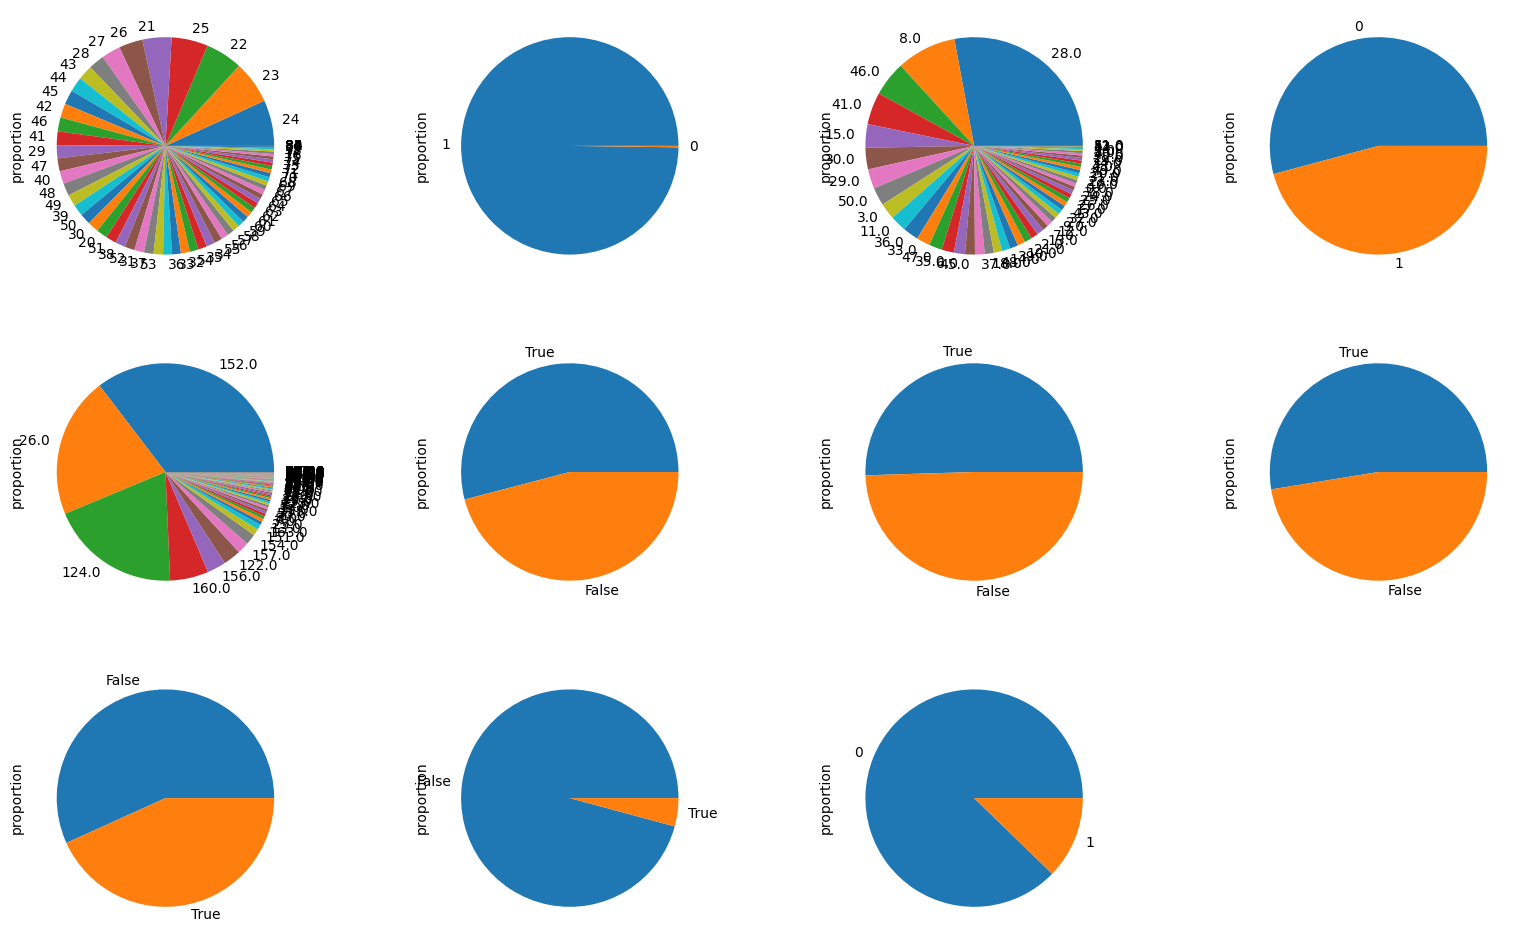

In [28]:
# Check for unbalanced features
columns_to_check = ['Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Policy_Sales_Channel',
                    'Gender', 'Vehicle_Damage', 'Vehicle_Age_1-2 Year',
                    'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years', 'Response']
plt.figure(figsize=(20, 12))
for idx, value in enumerate(columns_to_check):
    print("\n", value, "count: ", dataset[value].value_counts())
    print(value, "Normalized count: ", dataset[value].value_counts(normalize=True))
    plt.subplot(3, 4, idx + 1)
    dataset[value].value_counts(normalize=True).plot.pie()
plt.show()

In [29]:
# Dropping feature Driving_License
# 1 = 0.998 && 0 = 0.002
dataset.drop('Driving_License', axis=1, inplace=True)

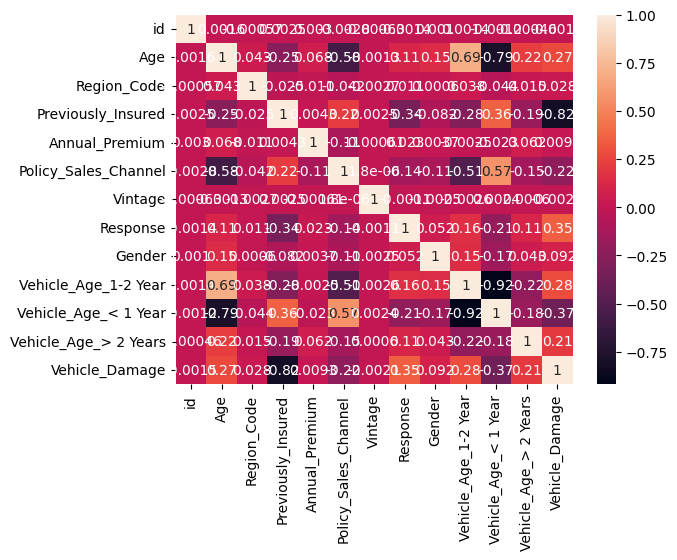

In [30]:
# Check collinearity between features
corrMatrix = dataset.corr()
plt.figure()
sn.heatmap(corrMatrix, annot=True)
plt.show()

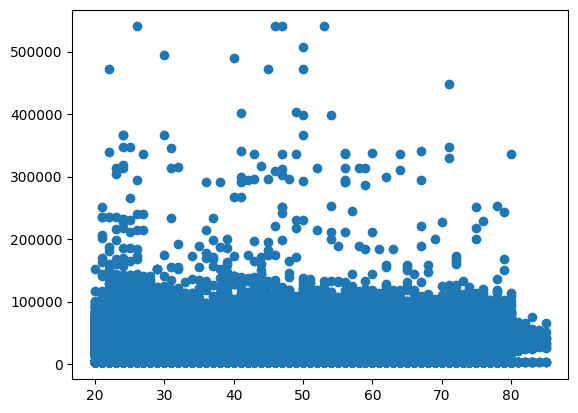

In [31]:
# Checking correlation between Annual_Premium and Age
plt.figure()
plt.scatter(dataset['Age'], dataset['Annual_Premium'])
plt.show()

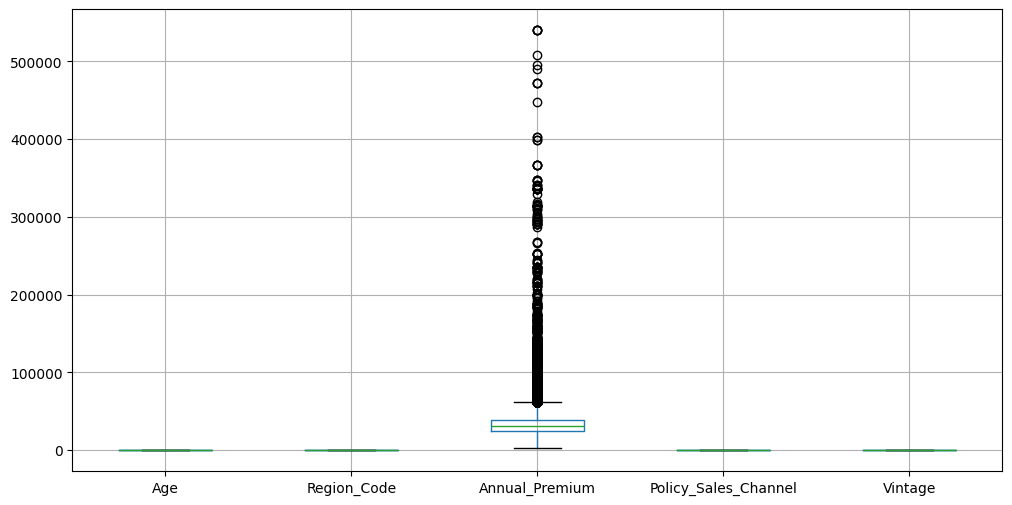

In [32]:
# Boxplots
columns_to_boxplot = ['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']
plt.figure(figsize=(12, 6))
dataset.boxplot(columns_to_boxplot)
plt.show()

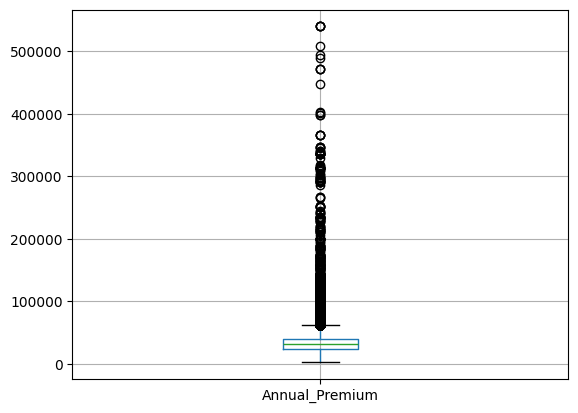

In [33]:
# Checking for HLP for Annual_Premium feature
plt.figure()
dataset.boxplot('Annual_Premium')
plt.show()

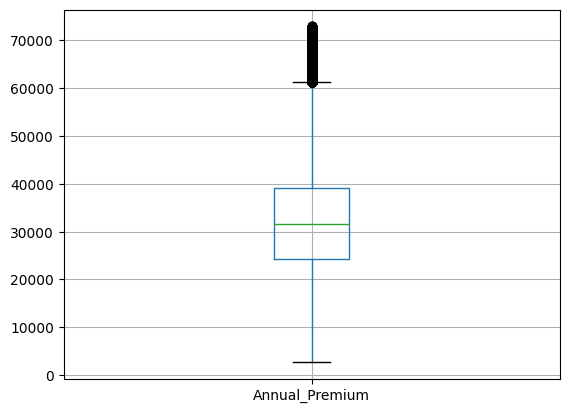

In [34]:
# Removing 1% of the highest values
dataset = dataset[(dataset.Annual_Premium < dataset.Annual_Premium.quantile(.99))]
plt.figure()
dataset.boxplot('Annual_Premium')
plt.show()

In [35]:
# Features normalization
features_to_normalize = ['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']
scaler = preprocessing.MinMaxScaler()
dataset[features_to_normalize] = scaler.fit_transform(dataset[features_to_normalize])
print(dataset.head())

   id       Age  Region_Code  Previously_Insured  Annual_Premium  \
0   1  0.369231     0.538462                   0        0.537815   
1   2  0.861538     0.057692                   0        0.439449   
2   3  0.415385     0.538462                   0        0.507102   
3   4  0.015385     0.211538                   1        0.369535   
4   5  0.138462     0.788462                   1        0.353567   

   Policy_Sales_Channel   Vintage  Response  Gender  Vehicle_Age_1-2 Year  \
0              0.154321  0.716263         1    True                 False   
1              0.154321  0.598616         0    True                  True   
2              0.154321  0.058824         1    True                 False   
3              0.932099  0.667820         0    True                 False   
4              0.932099  0.100346         0   False                 False   

   Vehicle_Age_< 1 Year  Vehicle_Age_> 2 Years  Vehicle_Damage  
0                 False                   True            True 

# Classification

In [36]:
# Model Evaluation Functions
def model_scores(y_test, y_pred, y_pred_proba, show_plot):
    print('Confusion matrix :\n', confusion_matrix(y_test, y_pred))
    print('Accuracy :', accuracy_score(y_test, y_pred))
    print('AUC score :', roc_auc_score(y_test, y_pred_proba))
    print('F1-score :', f1_score(y_test, y_pred))
    print('Precision score :', precision_score(y_test, y_pred))
    print('Recall score :', recall_score(y_test, y_pred))
    fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr_test, tpr_test, label="ROC Curve")
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend()
    if show_plot:
        plt.show()

In [37]:
def model_evaluation(model, X_train, y_train, X_test, y_test, trained=False):
    if not trained:
        model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_train)[:, 1]
    print('Train dataset :')
    model_scores(y_train, y_pred, y_pred_proba, show_plot=False)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    print('\nTest dataset :')
    model_scores(y_test, y_pred, y_pred_proba, show_plot=True)

In [38]:
# Classification
TEST_SIZE = .2
dataset.drop('id', axis=1, inplace=True, errors='ignore') # Dropping 'id' column if exists, ignoring errors if it doesn't
print(dataset.head())
# dataset.drop('id', axis=1, inplace=True)  # This line is causing the error - remove it

        Age  Region_Code  Previously_Insured  Annual_Premium  \
0  0.369231     0.538462                   0        0.537815   
1  0.861538     0.057692                   0        0.439449   
2  0.415385     0.538462                   0        0.507102   
3  0.015385     0.211538                   1        0.369535   
4  0.138462     0.788462                   1        0.353567   

   Policy_Sales_Channel   Vintage  Response  Gender  Vehicle_Age_1-2 Year  \
0              0.154321  0.716263         1    True                 False   
1              0.154321  0.598616         0    True                  True   
2              0.154321  0.058824         1    True                 False   
3              0.932099  0.667820         0    True                 False   
4              0.932099  0.100346         0   False                 False   

   Vehicle_Age_< 1 Year  Vehicle_Age_> 2 Years  Vehicle_Damage  
0                 False                   True            True  
1                 Fals

In [39]:
# Split dataset into train and test set
y = dataset['Response'].values
X = dataset.drop('Response', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=1, stratify=y)

# Check if label are balanced
print("Train/Test shape:", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print("Test set % of labels == 1:", y_test.sum() / y.sum() * 100)
# Label are balanced

Train/Test shape: (301836, 11) (75460, 11) (301836,) (75460,)
Test set % of labels == 1: 20.000866776458352



##### LOGISTIC REGRESSION #####
Best parameters found:
 {'Cs': 1, 'cv': 3}
Train dataset :
Confusion matrix :
 [[264918      0]
 [ 36918      0]]
Accuracy : 0.8776885460978809
AUC score : 0.8187225437003376
F1-score : 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision score : 0.0
Recall score : 0.0

Test dataset :
Confusion matrix :
 [[66230     0]
 [ 9230     0]]
Accuracy : 0.877683540948847
AUC score : 0.8156505498338058
F1-score : 0.0
Precision score : 0.0
Recall score : 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


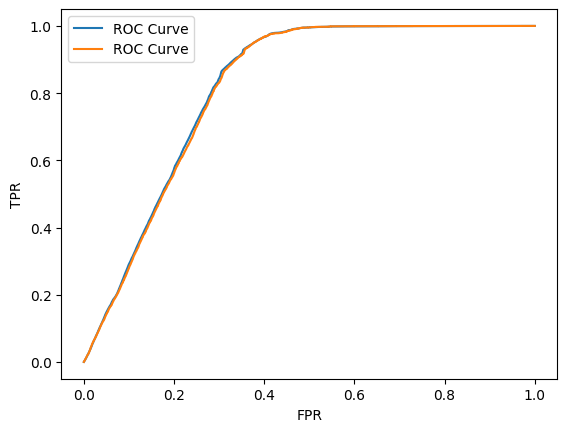

In [40]:
print("\n##### LOGISTIC REGRESSION #####")
# Logistic Regression
log_reg = LogisticRegressionCV()
clf = GridSearchCV(log_reg, {'Cs': [1, 3, 5, 10], 'cv': [3, 5]}, n_jobs=-1, cv=5)
clf.fit(X_train, y_train)
print('Best parameters found:\n', clf.best_params_)
model_evaluation(clf, X_train, y_train, X_test, y_test, trained=True)

In [42]:
# Dataset oversampling
smote = SMOTE(sampling_strategy='minority')
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

#  Check if label are balanced
print("Oversampled train shape:", X_train_sm.shape, y_train_sm.shape)
print("Original train shape:", X_train.shape, y_train.shape)
print("#1 in oversampled train:", y_train_sm.sum())
print("#1 in original train:", y_train.sum())
# Labels are equally distributed

Oversampled train shape: (529836, 11) (529836,)
Original train shape: (301836, 11) (301836,)
#1 in oversampled train: 264918
#1 in original train: 36918



##### LOGISTIC REGRESSION (oversampled data) #####
Best parameters found:
 {'Cs': 1, 'cv': 3}
Train dataset :
Confusion matrix :
 [[156621 108297]
 [  6027 258891]]
Accuracy : 0.7842275723053926
AUC score : 0.8266774643933537
F1-score : 0.8191379293979174
Precision score : 0.7050638909768293
Recall score : 0.9772495640160351

Test dataset :
Confusion matrix :
 [[39119 27111]
 [  220  9010]]
Accuracy : 0.6378081102570898
AUC score : 0.8226925089018882
F1-score : 0.3973451522568411
Precision score : 0.24943938429168627
Recall score : 0.9761646803900325


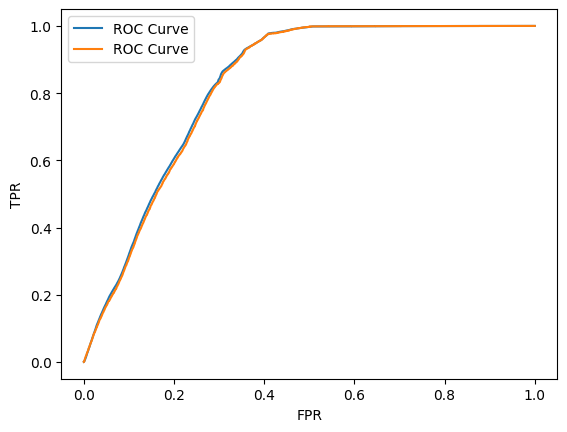

In [43]:
# Logistic Regression with oversampled train
print("\n##### LOGISTIC REGRESSION (oversampled data) #####")
clf = GridSearchCV(log_reg, {'Cs': [1, 3, 5, 10], 'cv': [3, 5]}, n_jobs=-1, cv=5)
clf.fit(X_train_sm, y_train_sm)
print('Best parameters found:\n', clf.best_params_)
model_evaluation(clf, X_train_sm, y_train_sm, X_test, y_test, trained=True)

In [ ]:
# Neural network parameters
parameter_space = {
    'hidden_layer_sizes': [(8, 5), (7,), (10, 3), (30,), (50, 50, 50), (50, 100, 50), (100,)],
    'alpha': [0.0001, 0.1, 1, 3, 5],
    'learning_rate': ['constant', 'adaptive'],
}


##### NEURAL NETWORKS #####
Train dataset :
Confusion matrix :
 [[264646    272]
 [ 36557    361]]
Accuracy : 0.877983408208431
AUC score : 0.8536124603035978
F1-score : 0.019227184362600198
Precision score : 0.5703001579778831
Recall score : 0.009778427867165068

Test dataset :
Confusion matrix :
 [[66147    83]
 [ 9152    78]]
Accuracy : 0.8776172806785052
AUC score : 0.8480801211641561
F1-score : 0.016611649451602598
Precision score : 0.484472049689441
Recall score : 0.008450704225352112


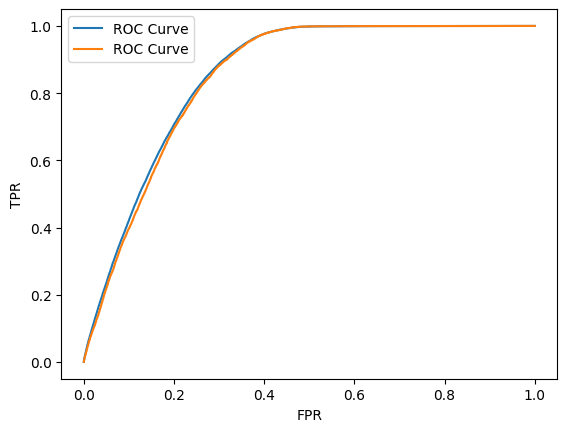

In [ ]:
# Neural Network
print("\n##### NEURAL NETWORKS #####")
# mpl = MLPClassifier(max_iter=500)
# Searching best parameters
# clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=5)
# clf.fit(X_train, y_train)
# Best parameter set
# print('Best parameters found:\n', clf.best_params_)
# {'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive'}
# model_evaluation(clf, X_train, y_train, X_test, y_test, trained=True)
mlp = MLPClassifier(max_iter=500, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate='adaptive')
model_evaluation(mlp, X_train, y_train, X_test, y_test, trained=False)


##### NEURAL NETWORKS (oversampled data) #####
Train dataset :
Confusion matrix :
 [[184440  80478]
 [ 14328 250590]]
Accuracy : 0.8210653862704685
AUC score : 0.8804106429143453
F1-score : 0.8409257935589091
Precision score : 0.7569139874587698
Recall score : 0.9459153398410074

Test dataset :
Confusion matrix :
 [[45549 20681]
 [ 1219  8011]]
Accuracy : 0.7097800159024649
AUC score : 0.835308815809642
F1-score : 0.4224988133537261
Precision score : 0.2792067475254426
Recall score : 0.8679306608884073


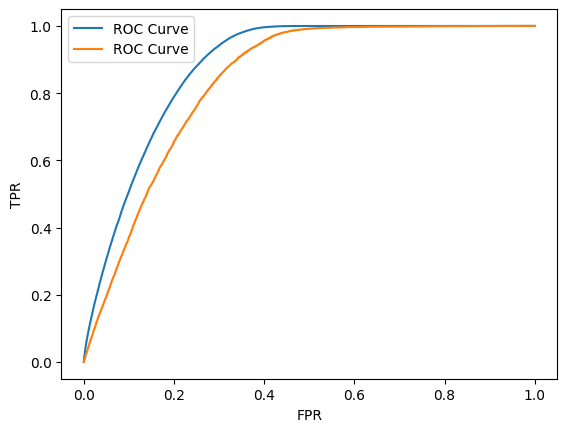

In [ ]:
# Neural network with oversampled train
print("\n##### NEURAL NETWORKS (oversampled data) #####")
# mpl = MLPClassifier(max_iter=500)
# Searching best parameters
# clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=5)
# clf.fit(X_train_sm, y_train_sm)
# Best parameter set
# print('Best parameters found:\n', clf.best_params_)
# {'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'adaptive'}
# model_evaluation(clf, X_train_sm, y_train_sm, X_test, y_test, trained=True)
mlp = MLPClassifier(max_iter=500, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate='adaptive')
model_evaluation(mlp, X_train_sm, y_train_sm, X_test, y_test, trained=False)

In [ ]:
plt.show()